In [1]:
import sys
sys.path.append('../../')
from src.util.config import Config

In [43]:
# parameter mechanism
bidder = ['L', 'L', 'G']
o_space = {'L':[0, 1], 'G':[0, 2]}
a_space = {'L':[0, 1], 'G':[0, 2]}

param_prior = {
    'distribution':'uniform',
    'corr': 0.9,
    }

param_util ={
    'payment_rule': 'first_price',
    'tie_breaking': 'local',
            }

# parameter approximation game
n = 64
m = 64

config = Config()
config.create_config_game("llg_auction", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
game.mechanism.own_gradient = False
if not game.mechanism.own_gradient:
    print('utilities computed')
    game.get_utility()


utilities computed


**Learner**
Specify Learning Algorithm

In [44]:
# parameter learner
max_iter = int(1e3)
tol = 1e-4
stop_criterion = 'util_loss'
param_learner = {
    'regularizer': 'entropic',
    'mirror_map': 'euclidean',
    'steprule_bool': False,
    'eta': 25,
    'beta': 0.05,
    'method': 'standard',
    }

config.create_config_learner("frank_wolfe", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [45]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

 60%|████████████        | 600/1.00k [00:28<00:19, 20.8it/s] 

Convergence after 600 iterations
Value of stopping criterion (util_loss) 0.0001


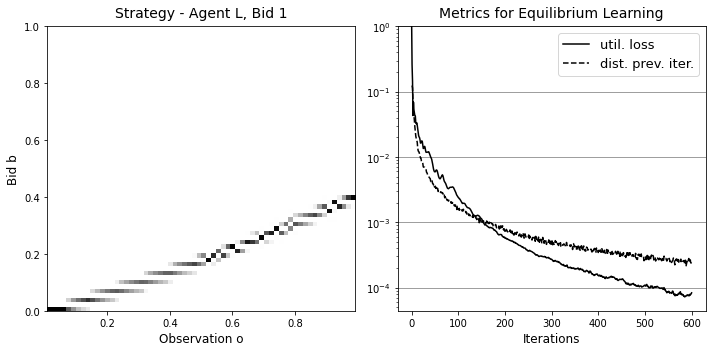

In [61]:
s = strategies['L']
s.plot(grad=False, metrics=True,)

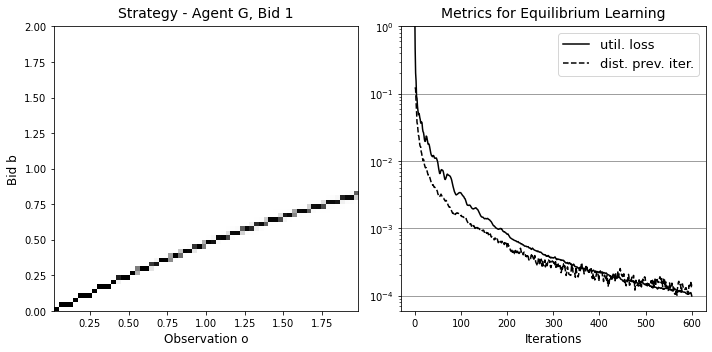

In [59]:
s = strategies['G']
s.plot(grad=False, metrics=True,)

In [47]:
import matplotlib.pyplot as plt 
import numpy as np

In [48]:
obs = game.mechanism.sample_types(150)

In [56]:
bids_local = strategies['L'].sample_bids(obs[0])
bids_global = strategies['G'].sample_bids(obs[2])

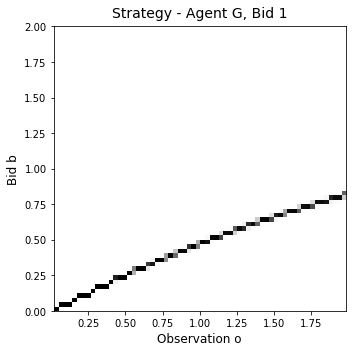

In [58]:
strategies['G'].plot()

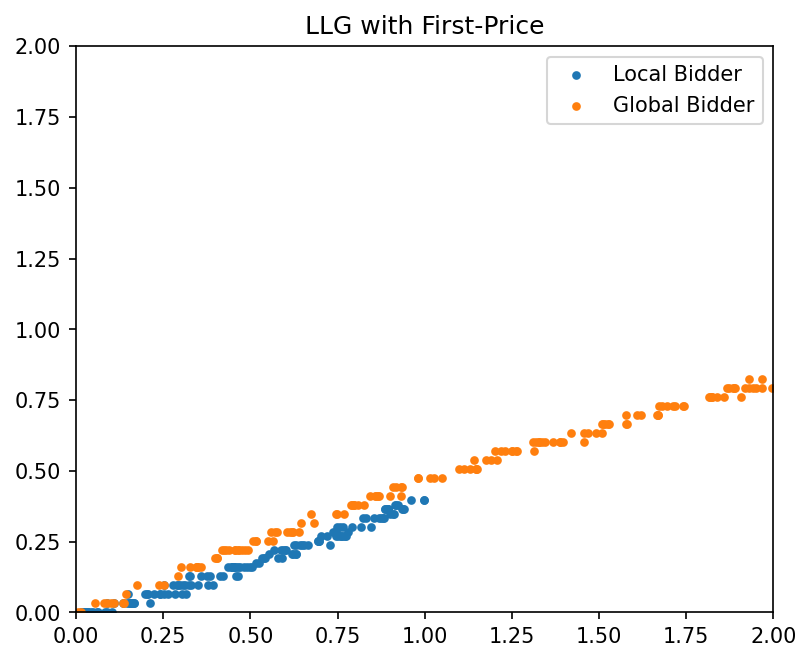

In [57]:
plt.figure(figsize=(6,5), dpi=150)
plt.scatter(obs[0], bids_local, s=10, label="Local Bidder")
plt.scatter(obs[2], bids_global,s=10, label='Global Bidder')
plt.ylim(0,2)
plt.xlim(0,2)
plt.legend()
plt.title('LLG with First-Price')
plt.show()